# Problem 1: Text mining case study

Study Chapters 1 through 4 of the NLP Book:  

http://www.nltk.org/book/   

Then answer the questions from these chapters as below.  Use NLTK and Py programming as needed.  

**CHAPTER 1:**	Getting Started with NLTK				    	

Following the example on Page 5-6, Pick a pair of words and compare their usage in two different texts, using the similar() and common_contexts() functions.  Explain your results.

In [5]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
print("Usage of 'death' in Sense and Sensibility and The Book of Genesis:",'\n')
text2.similar('death')
print()
text3.similar('death')
print("\nCommon contexts of 'life' and 'death' in Sense and Sensibility and The Book of Genesis:")
text3.common_contexts(['life','death'])
text6.common_contexts(['life','death'])

Usage of 'death' in Sense and Sensibility and The Book of Genesis: 

side heart marriage son conduct carriage character name family sister
house attachment goodness wife sake affection widow feelings situation
behaviour

face place cattle image host generations sight father mother wife eyes
voice presence head children hand way brother sheep flock

Common contexts of 'life' and 'death' in Sense and Sensibility and The Book of Genesis:
the_of
No common contexts were found


When looking at a "similar" range of contexts in both Sense and Sensibility and The Book of Genesis, the word 'death' both appear around and related to family, e.g. 'marriage', 'son', 'family', 'wife', 'sister', 'children', 'brother', 'father', 'mother'. That is particularly interesting. When looking at the common contexts for 'life' and 'death', Sense and Sensibility returns 'the_of', implying 'the life of' and 'the death of'. However, the Book of Genesis has no such common contexts found between that word pairing.

**CHAPTER 2:**  2.8 Exercises   (Page 74)						
Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [3]:
from nltk.corpus import state_union

import matplotlib.pyplot as plt

%matplotlib inline

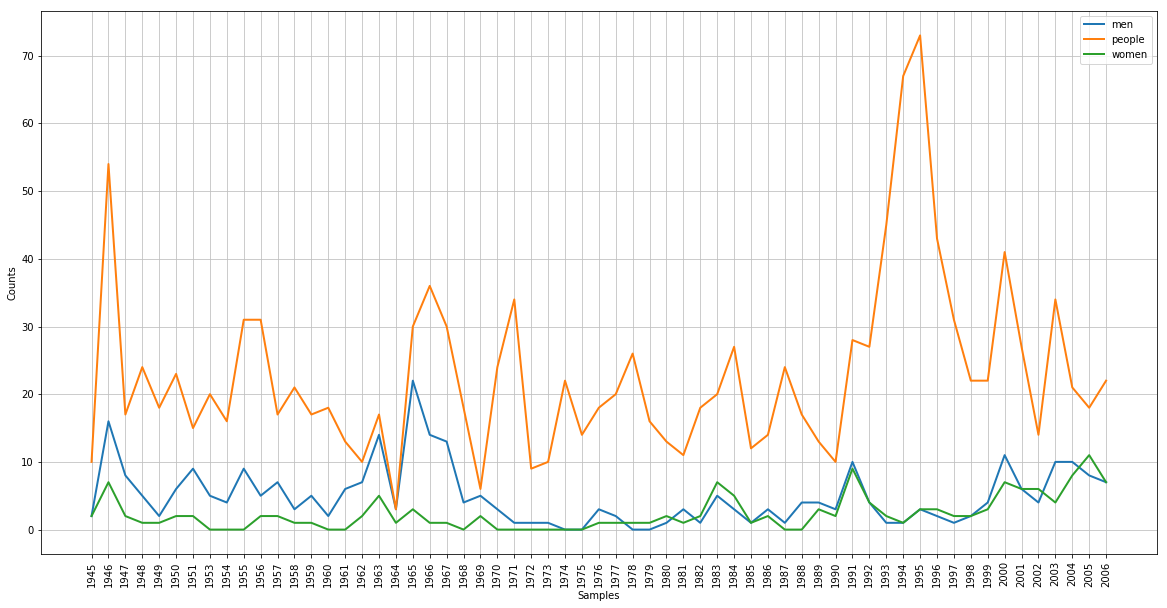

In [6]:
plt.figure(figsize=(20,10))

cfd = nltk.ConditionalFreqDist((target,fileid[:4])
                               for fileid in state_union.fileids()
                               for w in state_union.words(fileid)
                               for target in ['men','women','people']
                               if w.lower().startswith(target))
cfd.plot()

Before about 1970, the usage of the word 'men' was 5 to 10 times more likely than 'women', if 'women' were mentioned at all. This spiked around 1964 - 1967, while Lyndon B Johnson was president. After 1970, the usage of 'men' and 'women' followed each other very closely. The usage of 'people' is more volatile, with certain spikes around 1946 (President Harry S Truman), and 1993 - 1998 (President Bill Clinton).

**CHAPTER 3:**  3.12 Exercises    (Page 124)					
Save some text into a file corpus.txt. Define a function load(f) that reads from the file named in its sole argument, and returns a string containing the text of the file.

Use nltk.regexp_tokenize() to create a tokenizer that tokenizes the following kinds of expressions: monetary amounts; dates; names of people and organizations.

In [7]:
## Gettysburg Address
gettysburg_address = """Address Delivered at the Dedication of the Cemetery at Gettysburg 
Abraham Lincoln 
November 19, 1863

Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us -- that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion -- that we here highly resolve that these dead shall not have died in vain -- that this nation, under God, shall have a new birth of freedom -- and that government of the people, by the people, for the people, shall not perish from the earth.

Now, everyone give your mother $1.
"""

b = open("corpus.txt","w")
b.write(gettysburg_address)
b.close()

def load(f):
    txt = open(f,"r")
    return txt.read()

corp = load("corpus.txt")

In [8]:
from nltk.tokenize import RegexpTokenizer

In [9]:
t = RegexpTokenizer('\$\d+')
print('Monetary amounts in corpus:')
print(t.tokenize(corp))

Monetary amounts in corpus:
['$1']


In [10]:
t = RegexpTokenizer('[18|19|20]\d\d+|January|February|March|April|May|June|July|August|September|October|November|December')
print("Dates in corpus:")
print(t.tokenize(corp))

Dates in corpus:
['November', '1863']


In [11]:
tkns = nltk.word_tokenize(corp)
tags = nltk.pos_tag(tkns)
print('Names of people and organizations in corpus:')
[word[0] for word in tags if word[1] == 'NNP']

Names of people and organizations in corpus:


['Dedication',
 'Cemetery',
 'Gettysburg',
 'Abraham',
 'Lincoln',
 'November',
 'Four',
 'Liberty',
 'God']

# Problem 2: Working with text data

In this assignment you will learn how to predict tags for posts from [StackOverflow](https://stackoverflow.com) by using multilabel classification approach.


### Text preprocessing

In [12]:
from nltk.corpus import stopwords

In this assignment, we are using dataset of post titles from StackOverflow. You are provided three sets of files: *train*, *validation* and *test*. All corpora (except for *test*) contain the post's title and corresponding tags (100 tags are available). 

In [13]:
#Import relevant libraries
import pandas as pd
import numpy as np
from ast import literal_eval
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

In [14]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [15]:
train = read_data('train.tsv')
validation = read_data('validation.tsv')
test = pd.read_csv('test.tsv', sep='\t')

In [16]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [17]:
#Split the data into train/val/test
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

One of the major hurdles when working with text data is that it's unstructured and contains many unnecessary/weird tokens. To address this problem, it's usually useful to preprocess and clean the data. In this task you'll write a function, which will be used later. 

**Implement the function *text_processing* following the instructions. Run the function *test_test_processing* afterwards to test it on selected cases.**

In [18]:
#We'll be working with regular expressions to clean the text data
import re

In [19]:
replace_re_by_space = re.compile('[/(){}\[\]\|@,;]')
delete_re_symbols = re.compile('[^0-9a-z #+_]')
stop_words =  set(stopwords.words('english'))


def text_processing(text):
    """
        Input text: string
        
        Output: modified text based on RE
    """
    # add a function to convert text to lowercase
    text = str.lower(text)
    # add a function that remove all symbols in replace_re_by_space symbols and replace them by space in text
    text = re.sub(replace_re_by_space," ",text)
    # add function that simply remove all symbols in delete_re_symbols from text
    text = re.sub(delete_re_symbols,"",text)
    token_word=word_tokenize(text)
    filtered_sentence = [w for w in token_word if not w in stop_words] # filtered_sentence contain all words that are not in stopwords dictionary
    lenght_of_string=len(filtered_sentence)
    text_new=""
    for w in filtered_sentence:
        if w!=filtered_sentence[lenght_of_string-1]:
             text_new=text_new+w+" " # when w is not the last word so separate by whitespace
        else:
            text_new=text_new+w
    text = text_new# remove stopwords from text, nothing to do here
    return text

In [20]:
def text_processing_test():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_processing(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return "CONGRATS! ALL TESTS PASSED!"

In [21]:
#This should not throw an exception
print(text_processing_test())

CONGRATS! ALL TESTS PASSED!


We can now use our function *text_processing* on the data to clean the titles.

In [22]:
X_train = [text_processing(x) for x in X_train]
X_val = [text_processing(x) for x in X_val]
X_test = [text_processing(x) for x in X_test]

In [23]:
X_train[:3]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app']

### Convert text to word count vectors with CountVectorizer.

Machine Learning algorithms work with numeric data. There are many ways to transform text data to numeric vectors. In this task you will try to use two of them.

#### Word Counts with CountVectorizer

Create three vectors 

X_train_vectorizer

X_val_vectorizer

X_test_vectorizer

which are bag of words representation of X_train, X_val and X_test

You can use sklearn.feature_extraction.text.CountVectorizer as follow:

Create an instance of the CountVectorizer class.
Call the fit_transform() function in order to learn a vocabulary from a document and encode as a vector.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def count_vectorizer_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with proper parameters choice, 
    # add token_pattern= '(\S+)' to the list of parameter,  '(\S+)'  means any non white space
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    cv = CountVectorizer(token_pattern='(\S+)')
    
    X_train = cv.fit_transform(X_train)
    X_val = cv.transform(X_val)
    X_test = cv.transform(X_test)
    
    return X_train, X_val, X_test

In [25]:
#Run this cell
X_train_vectorizer, X_val_vectorizer, X_test_vectorizer = count_vectorizer_features(X_train, X_val, X_test)

#### TF-IDF

The second approach extends the CountVectorizer framework by taking into account total frequencies of words in the corpora. It helps to penalize too frequent words and provide better features space. 

Implement function *tfidf_features* using class [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from *scikit-learn*. Use *train* corpus to train a vectorizer. Don't forget to take a look into the arguments that you can pass to it. We suggest that you filter out too rare words (occur less than in 5 titles) and too frequent words (occur more than in 90% of the titles). Also, use bigrams along with unigrams in your vocabulary. 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with proper parameters choice, 
    # add token_pattern= '(\S+)' to the list of parameter,  '(\S+)'  means any non white space
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    tfidf_vectorizer = TfidfVectorizer(analyzer='word',max_df=0.9, max_features=1000,
                                 min_df=5, token_pattern='(\S+)', strip_accents='unicode', stop_words='english',
                                 use_idf=True, ngram_range=(1,2))
    
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_val, X_test

In [28]:
#Run this cell
X_train_tfidf, X_val_tfidf, X_test_tfidf = tfidf_features(X_train, X_val, X_test)

In [29]:
print('X_test_tfidf ', X_test_tfidf.shape) 
print('X_val_tfidf ',X_val_tfidf.shape)
print('X_val_vectorizer ',X_val_vectorizer.shape)

X_test_tfidf  (20000, 1000)
X_val_tfidf  (30000, 1000)
X_val_vectorizer  (30000, 33807)


### MultiLabel classifier

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose it is convenient to use [MultiLabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) from *sklearn*.

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer

In [31]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

Implement the function *train_classifier* for training a classifier. In this task we suggest to use One-vs-Rest approach, which is implemented in [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) class. In this approach *k* classifiers (= number of tags) are trained. As a basic classifier, use [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time, because a number of classifiers to train is large.

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [33]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    model = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=1000)).fit(X_train,y_train)
    return model

Train the classifiers for different data transformations: **CountVectorizer** and **tf-idf**.

In [34]:
classifier_vectorizer = train_classifier(X_train_vectorizer, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

Now you can create predictions for the data. You will need two types of predictions: labels and scores.

In [35]:
y_val_predicted_labels_vectorizer = classifier_vectorizer.predict(X_val_vectorizer)
y_val_predicted_scores_vectorizer = classifier_vectorizer.decision_function(X_val_vectorizer)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

Now take a look at how classifier, which uses TF-IDF, works for a few examples:

In [36]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails


Title:	sessions sinatra used pass variable
True labels:	ruby,session
Predicted labels:	


Title:	getting error type json exist postgresql rake db migrate
True labels:	json,ruby,ruby-on-rails
Predicted labels:	




Now, we would need to compare the results of different predictions, e.g. to see whether TF-IDF transformation helps or to try different regularization techniques in logistic regression. For all these experiments, we need to setup evaluation procedure. 

### Evaluation

To evaluate the results we will use several classification metrics:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 
 

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

Implement the function *print_evaluation_scores* which calculates and prints to stdout:
 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*

In [ ]:
def print_evaluation_scores(y_val, predicted):
    accuracy = accuracy_score(y_val,predicted)
    f1_score_macro = f1_score(y_val,predicted,average='macro')
    f1_score_micro = f1_score(y_val,predicted,average='micro')
    f1_score_weighted = f1_score(y_val,predicted,average='weighted')
    precision_weighted = average_precision_score(y_val,predicted,average='weighted')
    print("Accuracy = %.3f" % (accuracy),
          "\nF1_score_macro = %.3f" % (f1_score_macro),
          "\nF1_score_micro = %.3f" % (f1_score_micro),
          "\nF1_score_weighted = %.3f" % (f1_score_weighted),
          "\nPrecision_weighted = %.3f" % (precision_weighted))

In [ ]:
print('CountVectorizer model')
print_evaluation_scores(y_val, y_val_predicted_labels_vectorizer)
print('\nTfidf model')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

CountVectorizer model
Accuracy = 0.360 
F1_score_macro = 0.504 
F1_score_micro = 0.672 
F1_score_weighted = 0.650 
Precision_weighted = 0.512

Tfidf model
Accuracy = 0.300 
F1_score_macro = 0.450 
F1_score_micro = 0.607 
F1_score_weighted = 0.585 
Precision_weighted = 0.451


You might also want to plot some generalization of the [ROC curve](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) for the case of multi-label classification. Provided function *roc_auc* can make it for you. The input parameters of this function are:
 - true labels
 - decision functions scores
 - number of classes

In [ ]:
from sklearn.metrics import roc_curve, auc

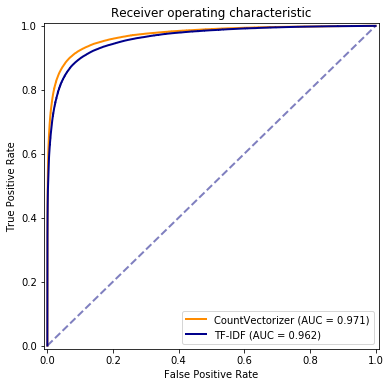

In [ ]:
# Flatten target and prediction and look at all predictions.
# Note, this will give a higher accuracy, as it looks at each prediction independently and not all together for a
# multi-class problem. However, we can still use it to compare the two classifiers: CountVectorizer and TF-IDF.

fpr_vec, tpr_vec, _ = roc_curve(y_val.flatten(), classifier_vectorizer.predict_proba(X_val_vectorizer).flatten())
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_val.flatten(), classifier_tfidf.predict_proba(X_val_tfidf).flatten())

roc_auc_vec = auc(fpr_vec, tpr_vec)
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)

fig, ax = plt.subplots(figsize=(6,6))

lw = 2
ax.plot(fpr_vec, tpr_vec, color='darkorange', lw=lw, label="CountVectorizer (AUC = %.3f)" % (roc_auc_vec))
ax.plot(fpr_tfidf, tpr_tfidf, color='darkblue', lw=lw, label="TF-IDF (AUC = %.3f)" % (roc_auc_tfidf))
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()

**Task 4 (MultilabelClassification).** Once we have the evaluation set up, we suggest that you experiment a bit with training your classifiers. 
- compare the quality of the CountVectorizer and TF-IDF approaches and choose one of them.

**In all of the metrics above (accuracy, F1 score, ROC curve), the CountVectorizer slightly outperforms TF-IDF. Therefore, we choose the CountVectorizer.**

- for the one you choose, try *L1* and *L2*-regularization techniques in Logistic Regression with different coefficients (e.g. C equal to 0.1, 1, 10, 100).

You also could try other improvements of the preprocessing / model, if you want. 

Print the evaluation scores, did you make any improvement?

In [ ]:
ps = ['l1', 'l2']
cs = [.1, 1, 10, 100]

for p in ps:
    for c in cs:
        print('*' * 70)
        vect_class = OneVsRestClassifier(LogisticRegression(solver='saga', penalty=p, C=c)).fit(X_train_vectorizer,y_train)
        y_val_pred = vect_class.predict(X_val_vectorizer)
        print("Penalty: %s" % (p),
              "\nC: %.1f" % (c))
        print_evaluation_scores(y_val,y_val_pred)

**********************************************************************
Penalty: l1 
C: 0.1
Accuracy = 0.326 
F1_score_macro = 0.476 
F1_score_micro = 0.636 
F1_score_weighted = 0.610 
Precision_weighted = 0.481
**********************************************************************
Penalty: l1 
C: 1.0
Accuracy = 0.367 
F1_score_macro = 0.517 
F1_score_micro = 0.680 
F1_score_weighted = 0.657 
Precision_weighted = 0.520
**********************************************************************
Penalty: l1 
C: 10.0
Accuracy = 0.361 
F1_score_macro = 0.521 
F1_score_micro = 0.679 
F1_score_weighted = 0.661 
Precision_weighted = 0.514
**********************************************************************


The default had the evaluation scores:

CountVectorizer,
Accuracy = 0.360, 
F1_score_macro = 0.504, 
F1_score_micro = 0.672, 
F1_score_weighted = 0.650, 
Precision_weighted = 0.512


After trying different penalty scores and different coefficients, we do not find a significant improvement in performance. Therefore, we recommend staying with the default, which took less time to evaluate.